In [23]:
import pandas as pd
from matplotlib import pyplot as plt

# 1. Preparetion

In [7]:
train_df = pd.read_csv('../dataset/spaceship-titanic/train.csv')

In [8]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# 2.EDA

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


- 最大は8693, PassengerId以外はnullが存在する

In [10]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


- 平均年齢28で20代が多い

In [39]:
print("HomePlanet: {} \n{}".format(train_df.HomePlanet.unique(), train_df.HomePlanet.value_counts()))
print("Destination: {} \n{}".format(train_df.Destination.unique(), train_df.Destination.value_counts()))
print("Cabin: {} \n{}".format(train_df.Cabin.unique(), train_df.Cabin.value_counts()))


HomePlanet: ['Europa' 'Earth' 'Mars' nan] 
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] 
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
Cabin: ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] 
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64


- HomePlanetは3種類
- Destinationは3種類
- Cabinは6561種類 (deck/num/side)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

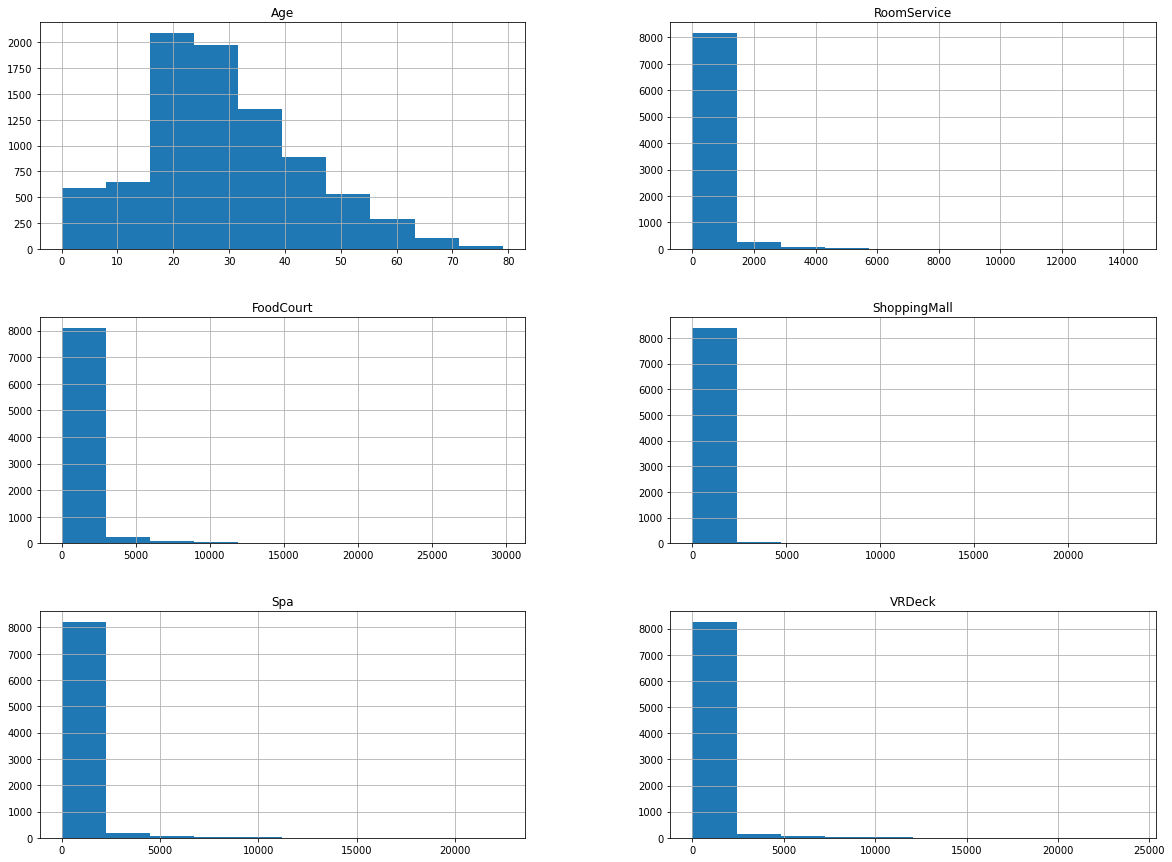

In [20]:
train_df.hist(bins=10, figsize=(20,15))

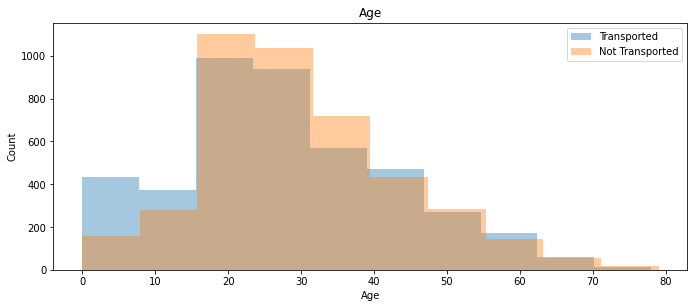

In [25]:
fig = plt.figure(figsize=(25,10))
 
p1 = fig.add_subplot(2,2,1)
p1.hist(train_df.Age[train_df.Transported == True], bins=10, alpha = .4)
p1.hist(train_df.Age[train_df.Transported == False], bins=10, alpha = .4)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Count')
labels = ["Transported", "Not Transported"]
plt.legend(labels)
 

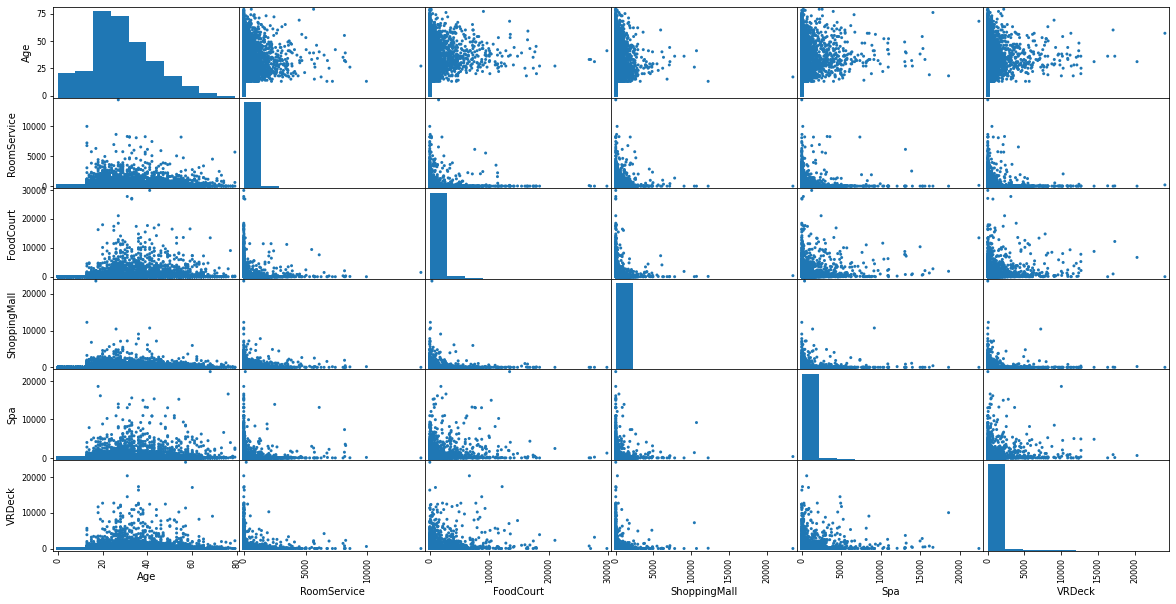

In [29]:
from pandas.plotting import scatter_matrix
scatter_train_df = train_df[['Age', 'RoomService', 'FoodCourt',	'ShoppingMall',	'Spa', 'VRDeck']]
x = scatter_matrix(scatter_train_df, alpha=1, figsize=(20, 10), diagonal='hist')

# 3. Preprocessing

In [117]:
def bool_to_int(df, columns):
    for column in columns:
        df[column] = df[column].fillna(False) # nan -> False
        df[column] = df[column].astype(int)
    return df

def preprocessing(df, bool_columns, onehot_columns, allow_null=False):
    # remove ignore columns
    df = df.drop(['Name'], axis=1)
    if not allow_null:
        df = df.dropna()
    # convert bool to int
    df = bool_to_int(df, columns=bool_columns)
    # convert Cabin to int by deck
    df['Cabin'] = df['Cabin'].fillna("_") # nan -> False
    df['Cabin'] = df['Cabin'].str[0]
    # convert categorical to one-hot
    df = pd.get_dummies(df, columns=onehot_columns)
    # set index
    df = df.set_index('PassengerId')
    return df

In [118]:
p_train_df = preprocessing(train_df, bool_columns=['Transported', 'CryoSleep', 'VIP'], onehot_columns=['HomePlanet', 'Destination', 'Cabin'], allow_null=True)

In [119]:
p_train_df.info()
p_train_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8514 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8512 non-null   float64
 4   FoodCourt                  8510 non-null   float64
 5   ShoppingMall               8485 non-null   float64
 6   Spa                        8510 non-null   float64
 7   VRDeck                     8505 non-null   float64
 8   Transported                8693 non-null   int64  
 9   HomePlanet_Earth           8693 non-null   uint8  
 10  HomePlanet_Europa          8693 non-null   uint8  
 11  HomePlanet_Mars            8693 non-null   uint8  
 12  Destination_55 Cancri e    8693 non-null   uint8  
 13  Destination_PSO J318.5-22  8693 non-null   u

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,Destination_TRAPPIST-1e,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin__
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,1,0,1,0,0,0,0,0,0,0
0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,...,1,0,0,0,0,0,1,0,0,0
0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,...,1,1,0,0,0,0,0,0,0,0
0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,1,1,0,0,0,0,0,0,0,0
0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,1,0,0,0,0,0,1,0,0,0


### Split train test data

In [120]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(p_train_df, test_size=0.2, shuffle=True, random_state=0)
train, valid = train_test_split(train, test_size=0.2, shuffle=True, random_state=1)
X_train, y_train = train.drop('Transported', axis=1), train['Transported']
X_valid, y_valid = valid.drop('Transported', axis=1), valid['Transported']
X_test, y_test = test.drop('Transported', axis=1), test['Transported']

In [121]:
X_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,Destination_TRAPPIST-1e,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin__
PassengerId,,,,,,,,,,,,,,,,,,,,,
3793_01,1,23.0,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,1,0,0
1326_02,0,19.0,0,1507.0,0.0,260.0,0.0,0.0,0,0,...,1,0,0,0,0,0,1,0,0,0
3099_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,1,0,0,0,0,1,0,0,0,0
3609_01,0,28.0,0,5.0,2052.0,0.0,3340.0,NaN,0,1,...,0,0,0,1,0,0,0,0,0,0
2755_01,1,36.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [122]:
y_train.head()

PassengerId
3793_01    1
1326_02    0
3099_01    1
3609_01    0
2755_01    1
Name: Transported, dtype: int64

# 4.Modeling

### 1. XGBoost

In [123]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_valid, y_valid)

params = {
    "objective" : "binary:logistic",
    "eval_metric" : "logloss"
}

results_dict = {}
model = xgb.train(
    params = params,
    dtrain = dtrain,
    evals = [(dtrain, "train"), (dvalid, "valid")],
    num_boost_round = 100,
    early_stopping_rounds = 10,
    evals_result = results_dict
)

[0]	train-logloss:0.57961	valid-logloss:0.58972
[1]	train-logloss:0.51558	valid-logloss:0.52832
[2]	train-logloss:0.47250	valid-logloss:0.49380
[3]	train-logloss:0.44405	valid-logloss:0.47285
[4]	train-logloss:0.42371	valid-logloss:0.45980
[5]	train-logloss:0.40968	valid-logloss:0.45048
[6]	train-logloss:0.39913	valid-logloss:0.44218
[7]	train-logloss:0.38673	valid-logloss:0.43921
[8]	train-logloss:0.37871	valid-logloss:0.43739
[9]	train-logloss:0.37402	valid-logloss:0.43500
[10]	train-logloss:0.36890	valid-logloss:0.43372
[11]	train-logloss:0.36362	valid-logloss:0.43356
[12]	train-logloss:0.36004	valid-logloss:0.43271
[13]	train-logloss:0.35740	valid-logloss:0.43296
[14]	train-logloss:0.35568	valid-logloss:0.43224
[15]	train-logloss:0.35428	valid-logloss:0.43231
[16]	train-logloss:0.35046	valid-logloss:0.43195
[17]	train-logloss:0.34687	valid-logloss:0.43045
[18]	train-logloss:0.34571	valid-logloss:0.43068
[19]	train-logloss:0.34414	valid-logloss:0.43101
[20]	train-logloss:0.33909	val

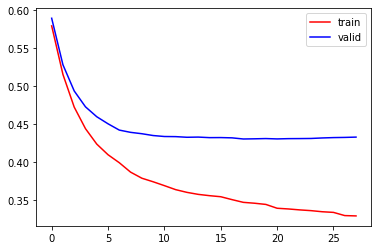

In [124]:
import matplotlib.pyplot as plt
plt.plot(results_dict["train"]["logloss"], color = "red", label = "train")
plt.plot(results_dict["valid"]["logloss"], color = "blue", label = "valid")
plt.legend()
plt.show()

In [125]:
pred = model.predict(xgb.DMatrix(X_valid))
print(pred)

[0.9862119  0.9927458  0.6529444  ... 0.98949426 0.744397   0.9956584 ]


In [126]:
import numpy as np
label = np.where(pred > 0.5, 1, 0)
print(label)

[1 1 1 ... 1 1 1]


In [127]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_valid, label)
print(acc)

0.7886412652767792


In [128]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_valid, pred)
print(auc)

0.8741136585527296


### 考察
- XGBoostでベースラインとした
- 正答率78%程度
- AUC: 88%程度

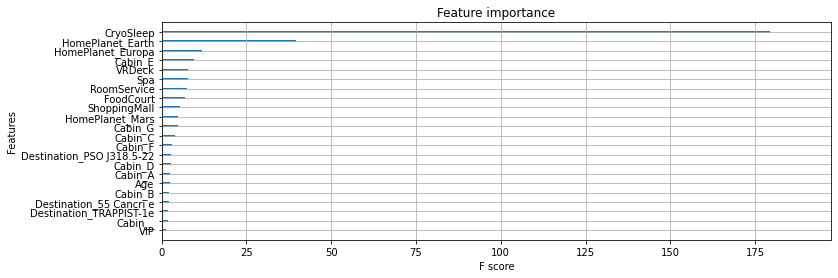

In [129]:
_, ax = plt.subplots(figsize=(12, 4))
xgb.plot_importance(model,
                    ax=ax,
                    importance_type='gain',
                    show_values=False)
plt.show()

# Utils

### 提出用ファイル作成

In [130]:
def create_submission(model, test, filename):
    pred = model.predict(xgb.DMatrix(test))
    label = np.where(pred > 0.5, True, False)
    submission = pd.DataFrame({'PassengerId': test.index, 'Transported': label})
    submission.to_csv(filename, index=False)
    return submission

In [131]:
test_df = pd.read_csv('../dataset/spaceship-titanic/test.csv')
p_test_df = preprocessing(test_df, bool_columns=['CryoSleep', 'VIP'], onehot_columns=['HomePlanet', 'Destination', 'Cabin'], allow_null=True)
p_test_df.info()
p_test_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   int64  
 1   Age                        4186 non-null   float64
 2   VIP                        4277 non-null   int64  
 3   RoomService                4195 non-null   float64
 4   FoodCourt                  4171 non-null   float64
 5   ShoppingMall               4179 non-null   float64
 6   Spa                        4176 non-null   float64
 7   VRDeck                     4197 non-null   float64
 8   HomePlanet_Earth           4277 non-null   uint8  
 9   HomePlanet_Europa          4277 non-null   uint8  
 10  HomePlanet_Mars            4277 non-null   uint8  
 11  Destination_55 Cancri e    4277 non-null   uint8  
 12  Destination_PSO J318.5-22  4277 non-null   uint8  
 13  Destination_TRAPPIST-1e    4277 non-null   u

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,Destination_TRAPPIST-1e,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin__
PassengerId,,,,,,,,,,,,,,,,,,,,,
0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,0,...,1,0,0,0,0,0,0,1,0,0
0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,0,...,1,0,0,0,0,0,1,0,0,0
0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,1,0,0,0,0,0,0
0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,1,...,1,0,0,1,0,0,0,0,0,0
0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [132]:

create_submission(model, p_test_df, 'submission_xgboost01.csv')

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


### 考察
- XGBoostは大小関係のみを見るため前処理がいらない
- XGBoostは前処理がいらなく精度もいいためベースラインとして良い